## PCA and tSNE

### Read libraries and data

In [2]:
library(tidyverse)
library(Rtsne)
library(plotly)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: Error in library(Rtsne): there is no package called ‘Rtsne’


In [ ]:
all_samples <- read.table("data/all_samples_250kb_histograms.txt", header = TRUE)
head(all_samples)

labels <- read.table("data/sample_types.txt", header = FALSE)
head(labels)

In [3]:
filename  <- "data/all_samples_250kb_histograms.txt"
read_lines(file = filename, n_max = 10)

[1] "sample bin 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700"
 [2] "PGDX10344P1 chr10_400 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 3 1 0 2 1 0 0 0 0 0 4 1 4 2 0 3 2 2 2 2 2 2 4 1 2 6 3 3 6 3 6 5 8 14 11 10 7 8 10 7 4 9 8 9 16 19 22 15 10 22 21 29 28 37 33 37 41 27 31 40 37 38 48 41 59 52 48 54 44 80 63 80 79 79 96 114 123 110 116 118 98 98 82 88 104 78 80 91 107 81 82 76 53 52 41 47 43 47 40 41 42 29 35 31 31 36 28 22 27 15 24 25 13 19 22 22 13 13 7 17 9 11 9 6 10 7 3 11 5 7 10 7 8 2 0 6 6 3 5 3 4 4 2 1 2 1 3 1 4 0 0 2 1 2 1 2 1 1 0 1 1 0 2 0 0 3 1 1 1 0 2 1 1 1 1 0 0 0 0 2 0 0 0 1 1 4 0 1 2 2 0 1 1 0 1 1 0 2 1 0 1 2 0 2 2 0 0 1 0 0 3 1 0 6 2 0 1 3 2 5 4 1 2 2 6 1 1 4 2 1 5 5 0 0 5 1 0 2 5 1 4 1 2 1 3 2 5 1 1 3 5 2 1 3 2 3 1 1 4 1 3 4 0 2 1 3 4 2 2 2 6 1 2 2 3 1 2 1 0 1 2 2 1 1 2 1 1 2 1 3 3 3 3 0 0 0 0 0 1 2 1 2 1 2 0 1 0 1 0 0 0 1 0 2 1 0 0 0 1 0 0 0 1 1 1 1 0 0 2 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [4]:
sizetotal <- file.size(filename)

pd <- tibble(line  = read_lines(file = filename , n_max = 100000)) %>%
  mutate(num_lines = row_number(),
         size      = str_length(line),
         cumsize   = cumsum(size),
         estimate  = num_lines * sizetotal/cumsize) %>%
  filter(num_lines %% 2000==0)

pd

line,num_lines,size,cumsize,estimate
PGDX10344P1 chr12_336 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 0 1 4 1 3 0 3 5 2 3 0 2 3 1 6 4 3 4 8 2 3 2 3 3 11 6 13 5 2 3 8 7 10 10 11 24 19 17 9 8 12 17 24 34 30 24 19 29 23 24 34 29 39 34 48 35 32 41 30 50 51 62 42 40 55 83 80 88 103 75 96 98 86 66 74 64 77 78 86 60 68 55 62 58 52 40 28 27 36 31 38 30 33 22 26 33 25 22 16 16 16 17 16 13 12 6 16 19 16 7 8 11 10 5 8 5 3 5 5 10 1 7 5 3 4 4 2 3 1 3 2 0 0 2 5 1 2 1 2 1 3 0 3 1 1 0 1 0 0 2 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 1 0 0 2 1 2 2 1 2 1 0 1 0 3 1 0 3 1 2 0 1 0 0 3 1 3 1 1 2 1 1 0 0 2 5 0 1 1 4 0 0 2 2 2 1 4 2 3 1 1 0 0 2 2 0 0 0 1 1 3 4 0 5 0 3 3 1 0 0 1 2 4 2 2 2 1 1 0 1 1 1 0 1 1 2 0 1 0 1 1 2 2 2 2 1 1 3 2 1 0 0 2 2 1 0 1 1 3 1 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0,2000,1443,2888900,4866212
PGDX10344P1 chr18_144 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 1 0 1 0 1 3 1 1 3 1 3 4 2 2 1 4 2 4 1 13 6 7 3 4 0 8 7 2 11 5 4 7 6 10 7 5 9 10 5 6 7 16 20 26 19 9 12 12 23 22 35 36 32 24 44 24 27 34 37 31 41 37 47 33 45 37 52 42 52 56 81 75 85 80 87 88 79 88 89 121 87 87 82 102 76 82 70 77 81 59 60 47 41 61 55 45 43 33 29 41 33 27 26 29 25 21 12 16 18 25 23 20 11 12 11 11 7 8 10 13 7 6 7 9 8 6 3 6 4 4 4 3 2 7 3 1 2 3 0 3 2 2 2 1 1 1 1 3 2 0 0 0 1 1 0 3 0 0 1 1 1 0 2 0 1 0 2 0 0 0 1 1 0 2 0 1 1 0 0 0 1 2 0 0 0 3 0 0 1 2 1 2 1 1 0 1 1 1 0 1 2 1 0 3 1 0 0 1 1 2 3 1 0 2 2 0 0 1 1 2 2 3 1 2 3 1 2 3 4 1 5 3 4 0 3 1 1 1 2 2 0 3 4 5 2 1 0 3 1 2 1 3 4 2 5 3 2 3 2 1 1 4 5 2 2 1 2 3 4 0 1 1 1 4 2 5 1 1 0 1 0 2 1 4 3 0 1 2 0 1 1 0 0 1 3 1 1 2 0 0 1 0 0 2 1 0 3 1 0 1 1 1 2 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0,4000,1445,5775937,4867781
PGDX10344P1 chr3_495 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 2 0 1 1 1 0 0 0 2 2 0 1 1 4 1 0 4 1 4 4 2 1 5 6 5 4 8 3 7 6 2 5 5 7 20 2 6 6 9 8 8 12 8 10 12 14 13 15 18 21 23 26 23 32 25 29 37 27 27 32 31 37 42 57 43 49 45 50 51 60 52 71 75 81 104 103 100 107 121 120 113 118 105 97 105 99 87 105 95 97 78 83 71 66 66 72 44 57 48 58 49 56 45 38 28 31 28 33 29 32 26 29 26 24 11 21 13 13 15 17 10 16 7 19 15 13 7 13 8 1 10 5 7 4 5 6 3 4 7 7 3 2 5 5 3 4 2 2 4 4 3 2 4 1 2 1 0 2 1 3 1 0 0 1 0 0 1 0 1 2 1 0 2 0 1 0 0 1 0 1 0 0 1 0 0 0 3 1 1 0 0 2 1 1 2 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 3 4 0 2 0 2 3 1 2 2 0 0 1 0 4 1 2 0 1 2 3 4 2 2 2 2 3 0 1 3 2 3 2 3 3 2 2 0 2 1 5 3 2 2 2 2 1 1 1 2 2 3 3 1 2 2 3 1 3 0 0 0 2 5 1 4 3 3 4 6 1 2 0 1 3 1 2 1 1 3 2 1 1 1 1 3 1 2 1 3 1 1 0 2 0 1 2 0 1 1 1 1 1 0 0 2 1 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0

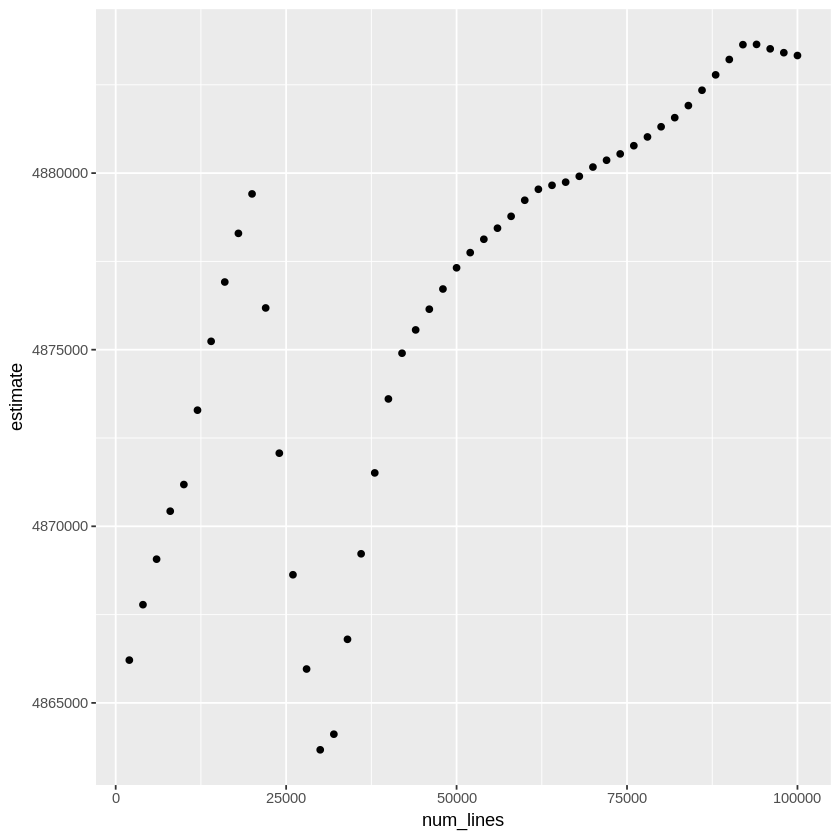

In [5]:
ggplot(pd, aes(x=num_lines, y=estimate)) + geom_point()

In [6]:
rm(sizetotal, pd)

In [8]:
small_test <- read_tsv(file = filename, col_names = T, comment = "#", skip = 0, n_max = 20)
colnames(small_test)

Parsed with column specification:
cols(
  `sample bin 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 

[1] "sample bin 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700"

In [9]:
f <- function(df1, pos) {
  names(df1) <- colnames(small_test)
  return(df1)
}

df <- read_tsv_chunked(file = filename, 
                 callback = DataFrameCallback$new(f), 
                 chunk_size = 10000, col_names = F, comment = "#"
                 )

Parsed with column specification:
cols(
  X1 = col_character()
)


In [10]:
df

sample bin 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700
sample bin 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 38

In [11]:
write_rds(x = df, path = "data/all_samples_compact.rds", compress = "gz")

rm(f, df)

In [12]:
unlink(filename, force = TRUE)

In [ ]:
df <- read_rds(path = "data/all_samples_compact.rds")

df <- df %>%
  mutate(gene_length = end-start)

ggplot(df, aes(x=gene_length)) + 
  geom_histogram(bins = 50) +
  scale_x_log10()

### PCA

In [ ]:
all_samples <- all_samples %>% as_tibble()
pr.out <- prcomp(all_samples, scale=TRUE)

In [ ]:
ggplot() +
  geom_point(aes(pr.out$x[,1],pr.out$x[,2])) +
  theme_minimal() +
  ylab('PC1') + xlab('PC2')

In [ ]:
ggplot() +
  geom_point(aes(pr.out$x[,1],pr.out$x[,2], color = labels)) +
  theme_minimal() +
  ylab('PC1') + xlab('PC2')

In [ ]:
var_exp <- tibble(PC = 1:dim(pr.out$x)[2], 
                  Variance_Explained = pr.out$sdev^2 / sum(pr.out$sdev^2),
                  Cumulative_Variance_Explained = cumsum(Variance_Explained))


var_exp %>% 
  ggplot(aes(PC, Variance_Explained)) + 
  geom_line() + 
  geom_point() + 
  theme_minimal() 

### tSNE

In [ ]:
set.seed(1)

#perprlexity 30
tsne_tcga3_30 <- Rtsne(data, dims = 3, perplexity=30, 
              verbose=FALSE, max_iter = 500)

names(tsne_tcga3_30)
lowd_map_tcga3_30 <- data.frame(tsne_tcga3_30$Y)
lowd_map_tcga3_30$response <- factor(response)
lowd_map_tcga3_30$tissue <- factor(tissue)

ggplot(lowd_map_tcga3_30, aes(x= X1, y = X2)) + ggtitle("tSNE") + geom_point()

ggplot(lowd_map_tcga3_30, aes(x= X1, y = X2)) + ggtitle("tSNE") +
  geom_point(aes(color = response, shape = tissue)) + scale_shape(solid = F)

head(lowd_map_tcga3_30)

fig <- plot_ly(lowd_map_tcga3_30, x = ~X1, y = ~X2, z = ~X3, 
               color = ~response, symbol = ~tissue, size = I(30))
fig <- fig %>% add_markers()
fig <- fig %>% layout(scene = list(xaxis = list(title = 'X1'),
                                   yaxis = list(title = 'X2'),
                                   zaxis = list(title = 'X3')))

fig